# Factors affecting Credit Analysis
## by (Pride Ngonidzashe Guwhe)





## Investigation Overview


In this investigation, I wanted to look at factors most significant when conducting credit analysis. The main focus was on the variables that were significant under the five Cs (capacity, capital, conditions, character, and collateral) when conducting credit analysis. The following variables in the dataset were selected taking into consideration the five Cs:
Term, Loanstatus, BorrowerAPR, BorrowerRate, LenderYield, Occupation, EmploymentStatus, EmploymentStatusDuration, LoanOriginalAmount, IsBorrowerHomeowner, IncomeVerifiable, DebtToIncomeRatio, StatedMonthlyIncome, AverageCreditScore and ListingConditions.


## Dataset Overview
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
loan_data= pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
print(loan_data.shape)

(113937, 81)


In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# retaining columns that are significant to the research questions
loan_data = loan_data.loc[:, ["Term", "LoanStatus", "BorrowerAPR", "BorrowerRate", "LenderYield", "DebtToIncomeRatio", "ListingCategory (numeric)", "Occupation", "EmploymentStatus", "EmploymentStatusDuration", "IsBorrowerHomeowner", "CreditScoreRangeLower", "CreditScoreRangeUpper", "IncomeVerifiable", "StatedMonthlyIncome", "LoanOriginalAmount"]]
loan_data.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,DebtToIncomeRatio,ListingCategory (numeric),Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount
0,36,Completed,0.16516,0.1580,0.1380,0.17,0,Other,Self-employed,2.0,True,640.0,659.0,True,3083.333333,9425
1,36,Current,0.12016,0.0920,0.0820,0.18,2,Professional,Employed,44.0,False,680.0,699.0,True,6125.000000,10000
2,36,Completed,0.28269,0.2750,0.2400,0.06,0,Other,Not available,NaN,False,480.0,499.0,True,2083.333333,3001
3,36,Current,0.12528,0.0974,0.0874,0.15,16,Skilled Labor,Employed,113.0,True,800.0,819.0,True,2875.000000,10000
4,36,Current,0.24614,0.2085,0.1985,0.26,2,Executive,Employed,44.0,True,680.0,699.0,True,9583.333333,15000


In [6]:
# checking for missing values
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerAPR                113912 non-null  float64
 3   BorrowerRate               113937 non-null  float64
 4   LenderYield                113937 non-null  float64
 5   DebtToIncomeRatio          105383 non-null  float64
 6   ListingCategory (numeric)  113937 non-null  int64  
 7   Occupation                 110349 non-null  object 
 8   EmploymentStatus           111682 non-null  object 
 9   EmploymentStatusDuration   106312 non-null  float64
 10  IsBorrowerHomeowner        113937 non-null  bool   
 11  CreditScoreRangeLower      113346 non-null  float64
 12  CreditScoreRangeUpper      113346 non-null  float64
 13  IncomeVerifiable           11

In [7]:
# dropping missing values
loan_data.dropna(inplace=True)

In [8]:
# adding a new column 
loan_data['AverageCreditScore'] = loan_data.apply(lambda row: (row.CreditScoreRangeLower + row.CreditScoreRangeUpper)/2, axis = 1)
loan_data.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,DebtToIncomeRatio,ListingCategory (numeric),Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,AverageCreditScore
0,36,Completed,0.16516,0.1580,0.1380,0.17,0,Other,Self-employed,2.0,True,640.0,659.0,True,3083.333333,9425,649.5
1,36,Current,0.12016,0.0920,0.0820,0.18,2,Professional,Employed,44.0,False,680.0,699.0,True,6125.000000,10000,689.5
3,36,Current,0.12528,0.0974,0.0874,0.15,16,Skilled Labor,Employed,113.0,True,800.0,819.0,True,2875.000000,10000,809.5
4,36,Current,0.24614,0.2085,0.1985,0.26,2,Executive,Employed,44.0,True,680.0,699.0,True,9583.333333,15000,689.5
5,60,Current,0.15425,0.1314,0.1214,0.36,1,Professional,Employed,82.0,True,740.0,759.0,True,8333.333333,15000,749.5


In [9]:
# changing the ListingCategory from numeric to categorical
list_cat={0:'Not Available',1:'Debt Consolidation',2:'Home Improvement',3:'Business',4:'Personal Loan',5:'Student Use',6:'Auto',
 7:'Other',8:'Baby&Adoption',9:'Boat',10:'Cosmetic Procedure',11:'Engagement Ring',12:'Green Loans',
 13:'Household Expenses',14:'Large Purchases',15:'Medical/Dental',16:'Motorcycle',17:'RV',18:'Taxes',19:'Vacation',20:'Wedding Loans'}

In [10]:
# running a loop over dataset and dictionary created.
# appending dictionary values to a list based on keys which are equal to the values present in our listing category.
l=[]
for i in range(loan_data.shape[0]):
    for j in range(len(list_cat)):
        if loan_data['ListingCategory (numeric)'].values[i] == list(list_cat.keys())[j]:
            l.append(list(list_cat.values())[j])

In [11]:
# assigning a new column with listing labels.
loan_data['ListingConditions'] = l

In [12]:
# dropping columns
loan_data.drop(labels=['ListingCategory (numeric)', 'CreditScoreRangeLower', 'CreditScoreRangeUpper'], axis=1, inplace=True)

In [13]:
# checking for missing data one last time
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96561 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Term                      96561 non-null  int64  
 1   LoanStatus                96561 non-null  object 
 2   BorrowerAPR               96561 non-null  float64
 3   BorrowerRate              96561 non-null  float64
 4   LenderYield               96561 non-null  float64
 5   DebtToIncomeRatio         96561 non-null  float64
 6   Occupation                96561 non-null  object 
 7   EmploymentStatus          96561 non-null  object 
 8   EmploymentStatusDuration  96561 non-null  float64
 9   IsBorrowerHomeowner       96561 non-null  bool   
 10  IncomeVerifiable          96561 non-null  bool   
 11  StatedMonthlyIncome       96561 non-null  float64
 12  LoanOriginalAmount        96561 non-null  int64  
 13  AverageCreditScore        96561 non-null  float64
 14  Listi

In [14]:
# checking for duplicated rows
sum(loan_data.duplicated())

730

In [15]:
loan_data.drop_duplicates(inplace=True)

In [16]:
# checking for duplicated rows one last time
sum(loan_data.duplicated())

0

## Distribution of Borrower APR & Borrower Rate

The distributions of the borrower APR and rate are bimodal. Borrower APR has a minimum value of 0.1 and maximum of 0.42. The highest peak of APR is 0.36. Borrower rate has minimum value of 0 and maximum of 0.36 with the highest peak at 0.32.

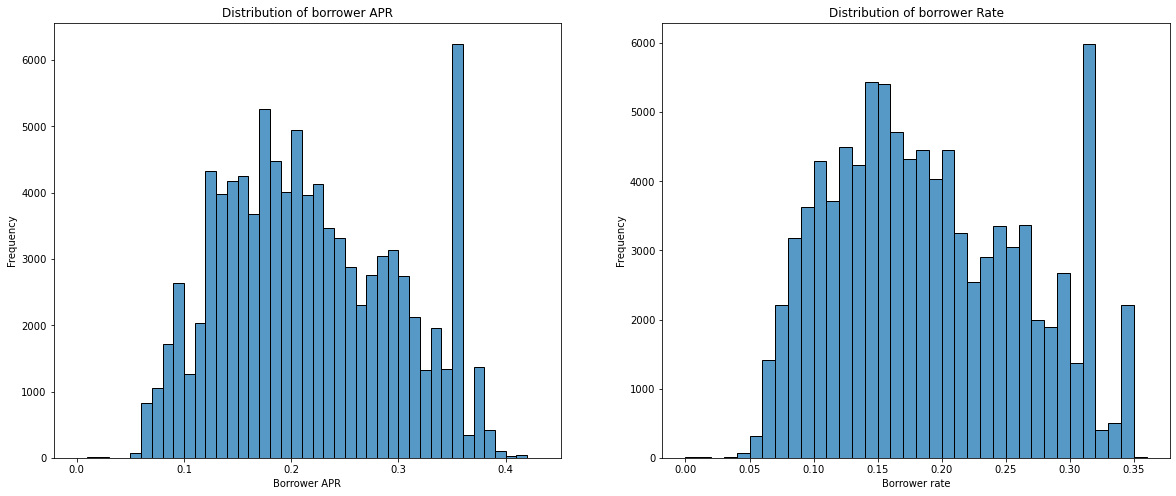

In [17]:
# plotting histogram.
plt.figure(figsize=[20, 8])
plt.subplot(1,2,1)
bins = np.arange(0, loan_data['BorrowerAPR'].max()+0.01,0.01)
sb.histplot(x = 'BorrowerAPR', data = loan_data, bins = bins)
plt.xlabel('Borrower APR')
plt.ylabel('Frequency')
plt.title('Distribution of borrower APR');


# plotting histogram.
plt.subplot(1,2,2)
bins = np.arange(0, loan_data['BorrowerRate'].max()+0.01,0.01) 
sb.histplot(x = 'BorrowerRate', data = loan_data, bins = bins)
plt.title('Distribution of borrower Rate')
plt.xlabel('Borrower rate')
plt.ylabel('Frequency');

## Association of numeric variables

The correlation heatmap shows the strength of the association of the numeric variables. Borrower APR, Borrower rate and Lender yield show a very strong positive correlation. This means an increase in either of these variables also translate to an increase of another and vice versa. Average credit score and loan original amount shows a moderate negative correlation with the varibles mentioned before. This means an increase in average credit score and loan original amount will lead to a decrease to Borrower APR, rate and lender yield; and the opposite is true. Other variables showed very weak to no correlation.

In [18]:
numeric_vars = ['Term','BorrowerAPR','BorrowerRate','LenderYield','LoanOriginalAmount','DebtToIncomeRatio','EmploymentStatusDuration','StatedMonthlyIncome','AverageCreditScore']
categoric_vars = ['LoanStatus', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeVerifiable', 'ListingConditions']

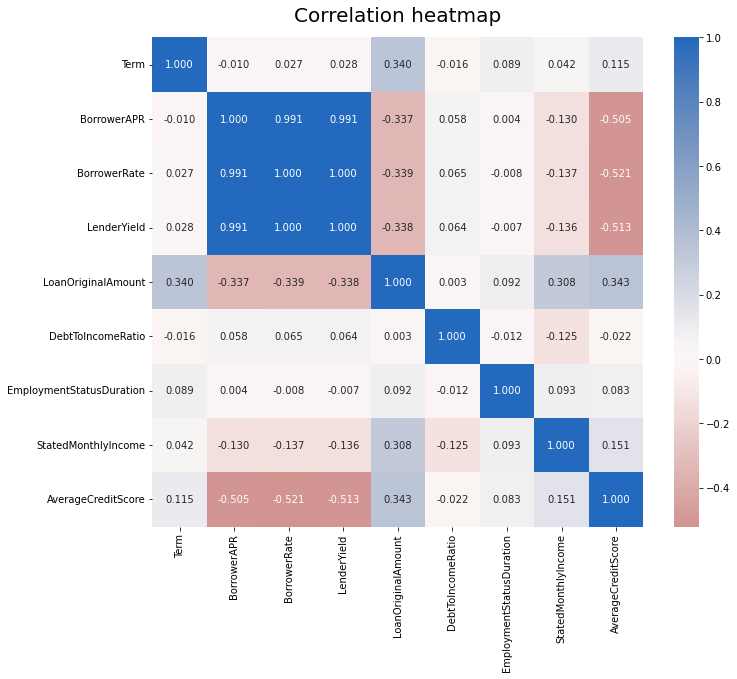

In [19]:
# correlation plot
plt.figure(figsize = [11,9])
sb.heatmap(loan_data[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation heatmap', y = 1.02, fontsize = 20)
plt.show()

## Employment Status vs Borrower APR & Rate

The box plot show 'Other' employment status has higher median borrower APR and rate compared to other employment statuses after taking a random sample of 5000 loans.

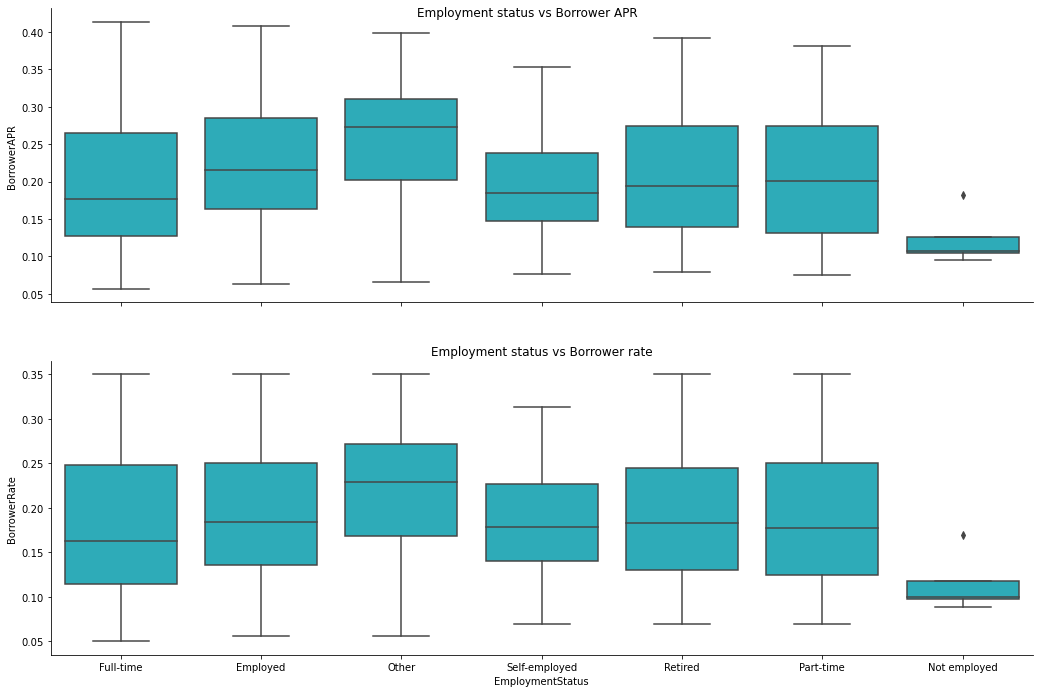

In [20]:
# plotting box plot.
loan_samp = loan_data.sample(n=5000, replace = False)
base_c=sb.color_palette()[9]
base_c2=sb.color_palette()[5]
g = sb.PairGrid(data = loan_samp, y_vars = ['BorrowerAPR', 'BorrowerRate'], x_vars = 'EmploymentStatus',height = 4.9,diag_sharey=False, aspect = 3)
g.map(sb.boxplot,color=base_c)
g.fig.suptitle('Employment status vs Borrower APR')
plt.title('Employment status vs Borrower rate')
plt.subplots_adjust(hspace = 0.2)
plt.show()

##  Loan Status vs DTI & Stated Monthly Income 

After taking the cubic root of DTI(debt to income ratio), we observe that 'defaulted' and 'cancelled' loan status have higher median scores of DTI than other loan status. This is likely because banks are reluctant to issues loan to borrowers with high DTI. The distribution of stated monthly income across all loans status categories after applying log transformation show a normal distribution although there are quite number of outliers shown by the data points overlapping the whiskers.

In [21]:
# log. transform on Stated Monthly Income
def log_trans(z,inverse=False):

    if not inverse:

        return np.log10(z)
    else:
        return z**3
    
loan_data['log_income'] = loan_data['StatedMonthlyIncome'].apply(log_trans)

In [22]:
# cube-root transform on DTI
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3
    
loan_data['cr_DTI'] = loan_data['DebtToIncomeRatio'].apply(cuberoot_trans) 

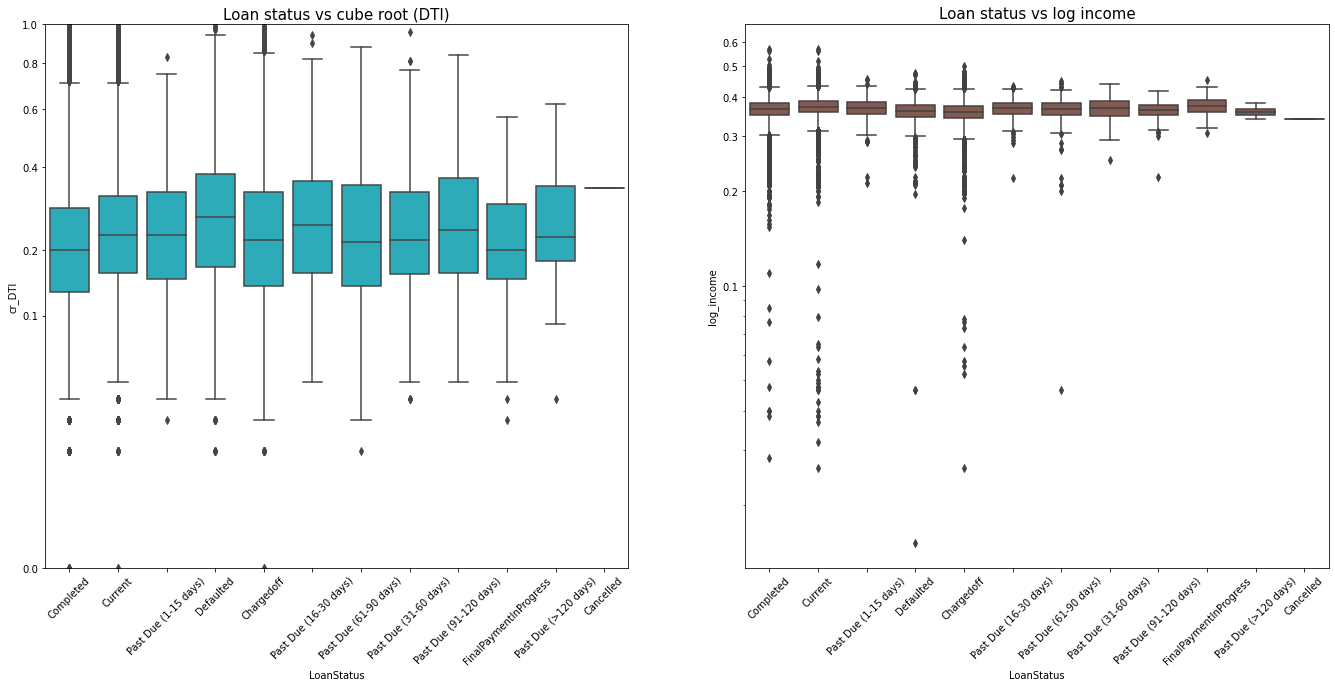

In [23]:
# plotting box plot.
plt.figure(figsize=(23,10))
plt.subplot(1,2,1)
base_c=sb.color_palette()[9]
base_c2=sb.color_palette()[5]
sb.boxplot(data=loan_data,x='LoanStatus',y='cr_DTI',color=base_c)
crDTI_ticks = [0.0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
plt.yticks(cuberoot_trans(np.array(crDTI_ticks)), crDTI_ticks)
plt.ylim([cuberoot_trans(0.0), cuberoot_trans(1.0)])
plt.title('Loan status vs cube root (DTI)', fontsize = 15)
plt.xticks(rotation=45);

plt.subplot(1,2,2)
sb.boxplot(data=loan_data,x='LoanStatus',y='log_income',color=base_c2)
plt.yscale('log')
plt.yticks([0.1e1, 0.2e1, 0.3e1, 0.4e1, 0.5e1, 0.6e1], [0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
plt.title('Loan status vs log income', fontsize = 15)
plt.xticks(rotation=45);

## Borrower APR vs Rate faceted by Employment Status

Out of all employment status, 'other' status is the only ones with minimum count of APR and rate greater than 0.2. Rest of the employment status have a 'cloud' of points below 0.2 for both APR and Rate. If borrower APR and rate are less than loan than 0.2, employment status is more likely to be anything except 'other'.

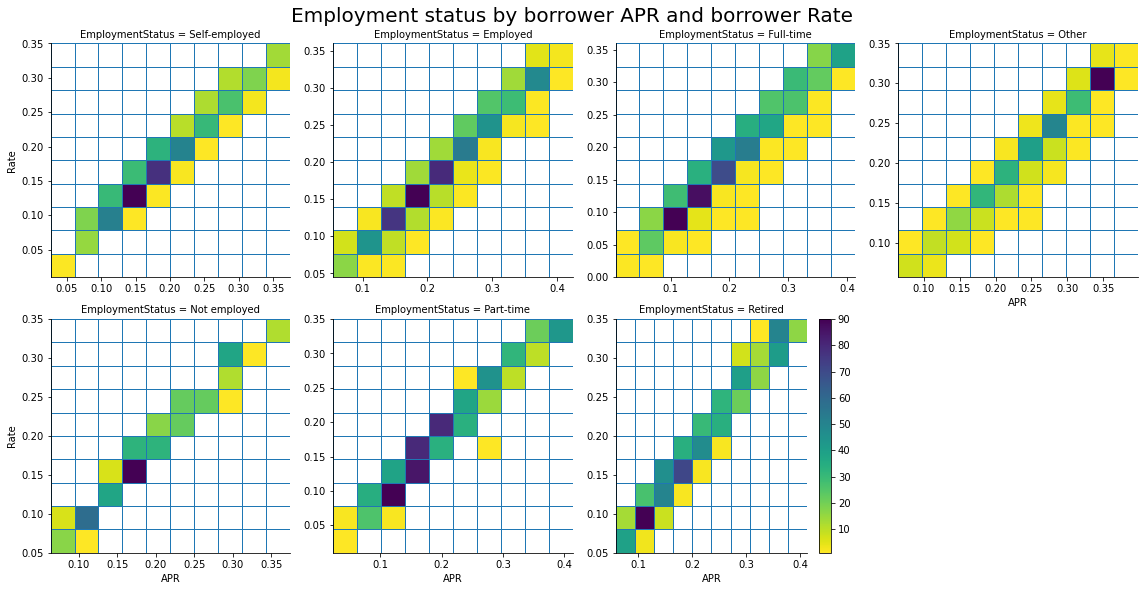

In [24]:
# Plotting heatmap using seavorn's facetgrid
g = sb.FacetGrid(data = loan_data, col = 'EmploymentStatus', col_wrap = 4, height = 4,sharex=False,sharey=False)
g.map(plt.hist2d, 'BorrowerAPR', 'BorrowerRate', cmap = 'viridis_r', cmin = 0.5)
g.set_xlabels('APR')
g.set_ylabels('Rate')
g.fig.suptitle('Employment status by borrower APR and borrower Rate',y=1.02, fontsize = 20)
plt.colorbar()
plt.show()

## Employment Status vs Loan Original Amount faceted by Listing Conditions

From the faceted violin plots, I observed that 'employed' employment status received higher loan original amount compared to other employment status categories for the majority listing conditions except of the following 'student use', 'personal loans', 'taxes' and 'not available'. This also means that borrowers with a 'employed' employment status are likely to list any of the listing conditions except for the ones previously noted.

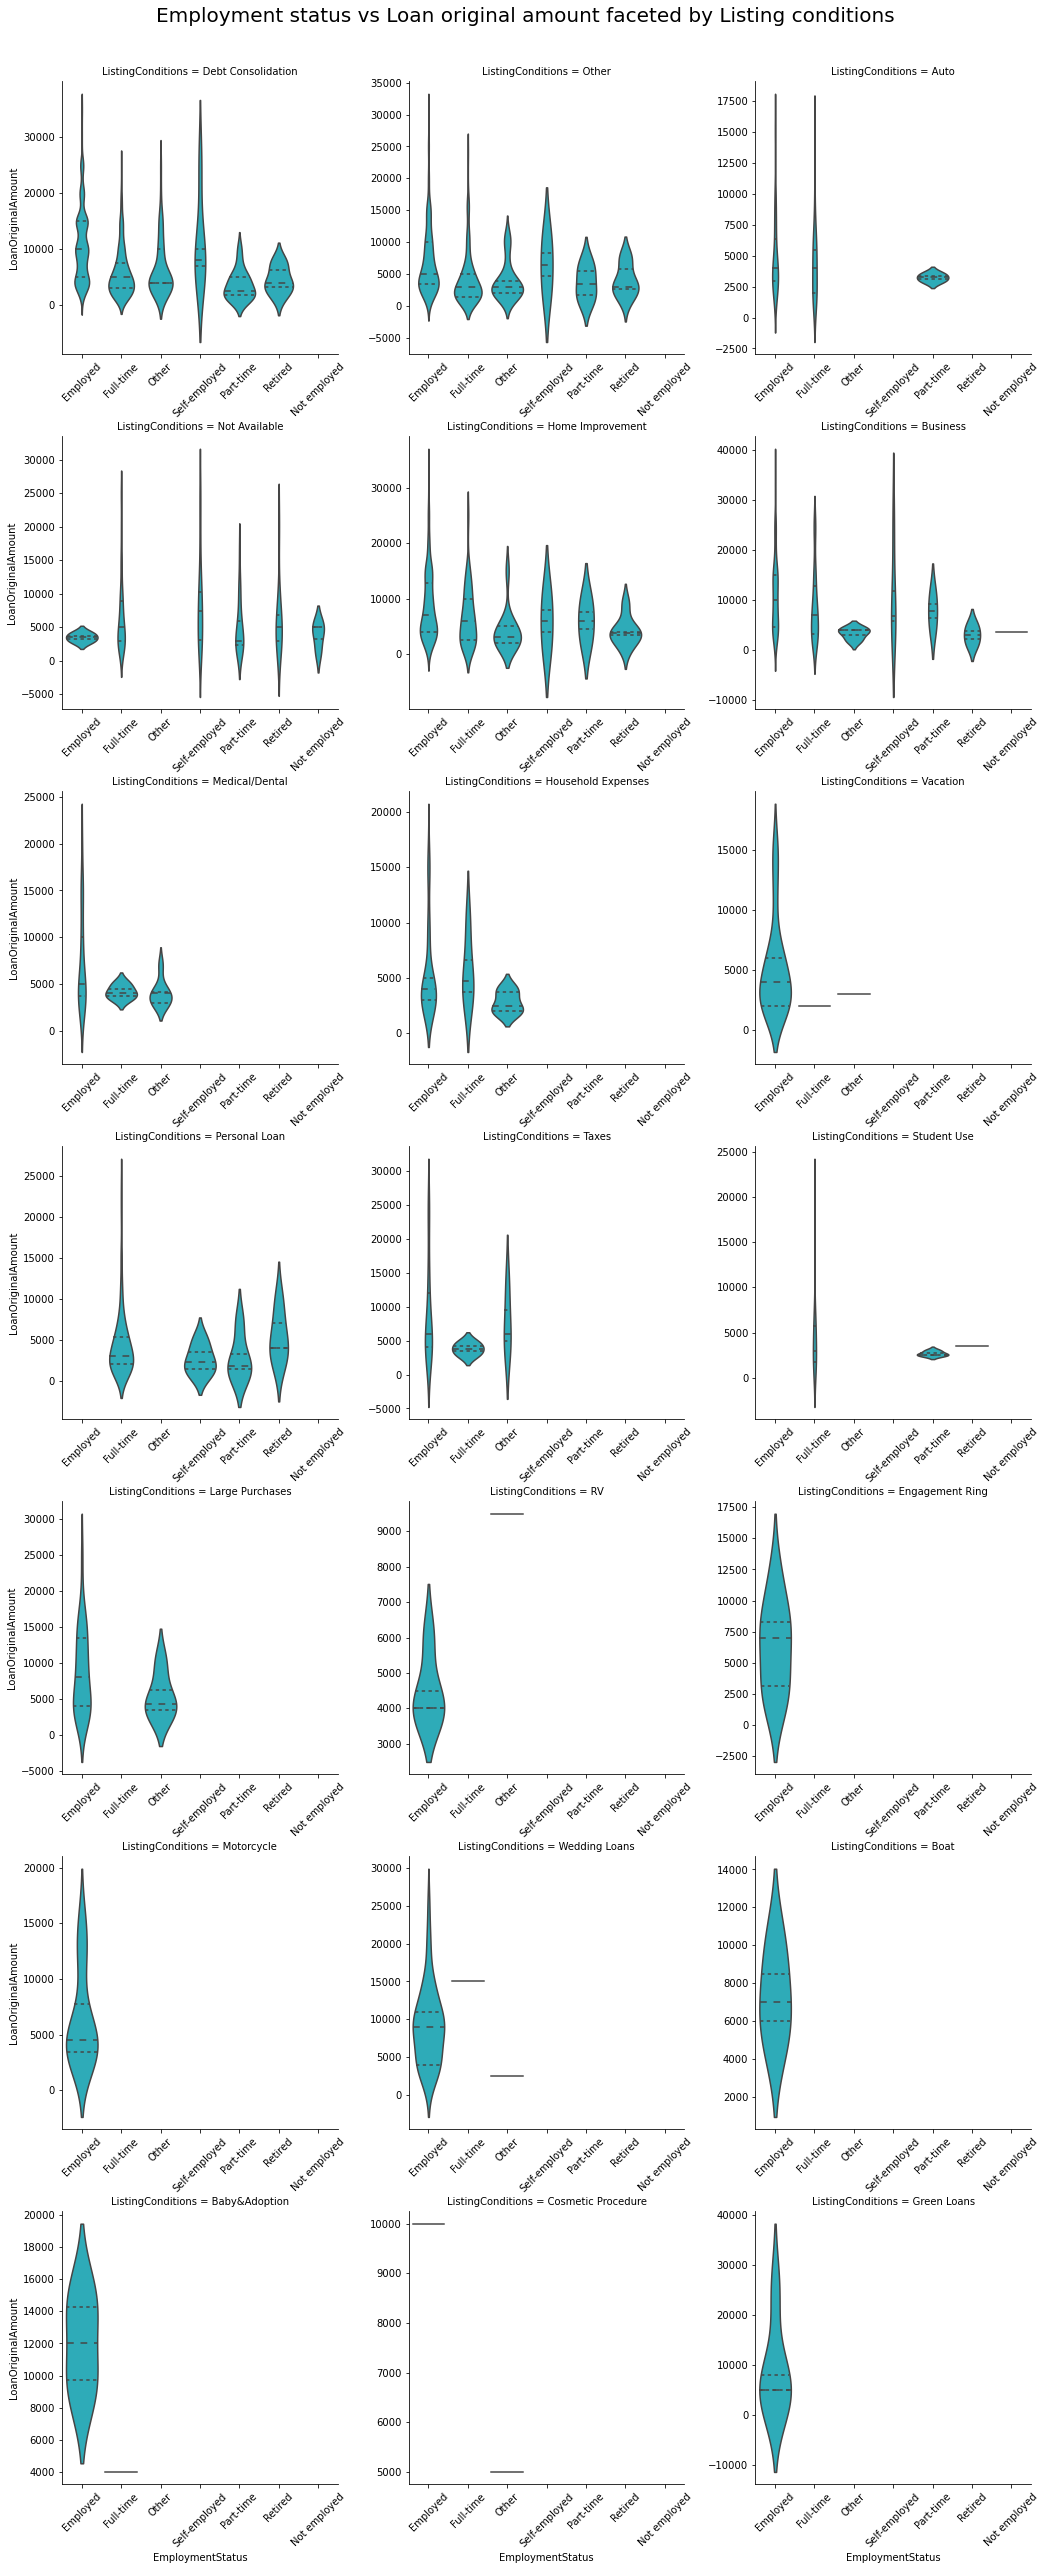

In [25]:
# plotting box plot.
Employment = loan_data.EmploymentStatus.value_counts()
g = sb.FacetGrid(data = loan_samp, col='ListingConditions', col_wrap=3, height = 4.9, sharex=False,sharey=False)
g.map(sb.violinplot, 'EmploymentStatus', 'LoanOriginalAmount', color=base_c, inner='quartile', order = Employment.index)
g.set_xticklabels(rotation=45)
g.fig.suptitle('Employment status vs Loan original amount faceted by Listing conditions', y =1.02, fontsize = 20)
plt.subplots_adjust(hspace = 0.3)
plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt